결측치 확인:
datetime            0
tempmax             0
tempmin             0
temp                0
dew                 0
humidity            0
precip              0
windspeed           0
sealevelpressure    0
moonphase           0
CO                  0
Nox                 0
Sox                 0
TSP                 0
PM-10               0
VOCs                0
NH3                 0
dtype: int64


C:\Users\limul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\limul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\limul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\limul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local

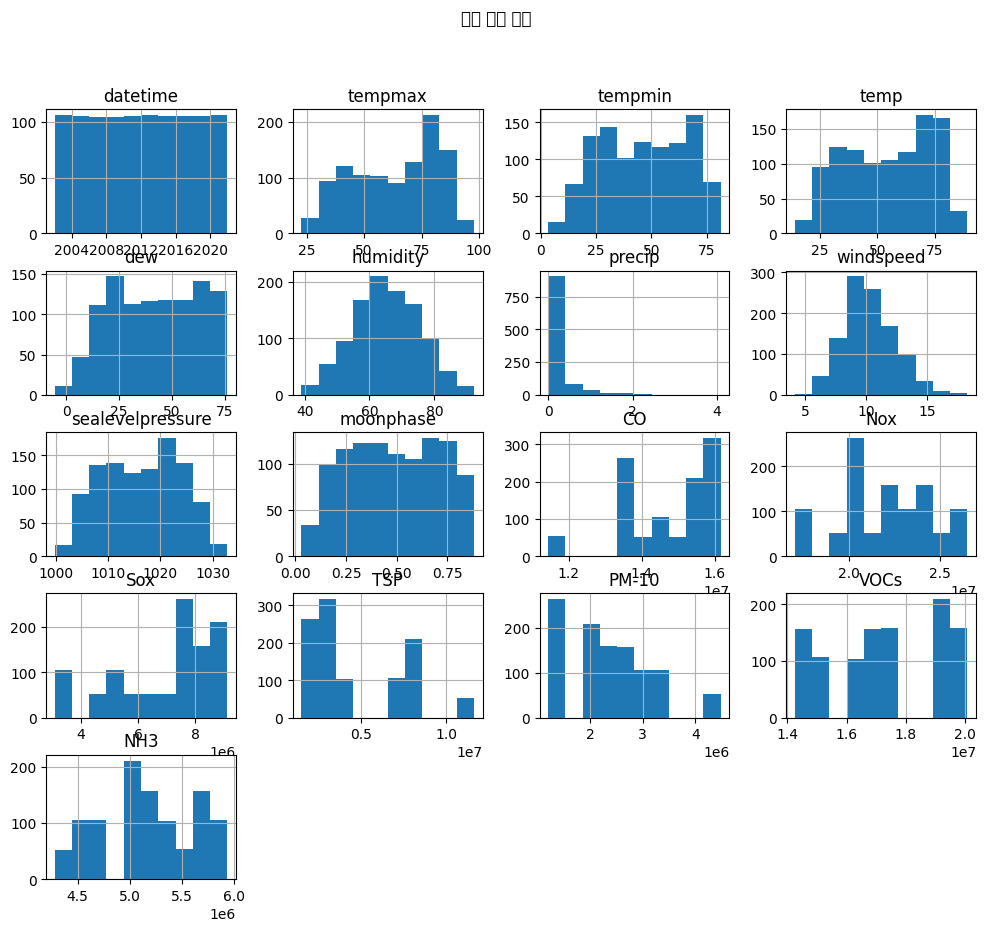


정상성 테스트 결과 (첫 번째 기후 변수):
ADF Statistic: -12.439517261507541
p-value: 3.7807895031697797e-23


C:\Users\limul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\limul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\limul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\limul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-

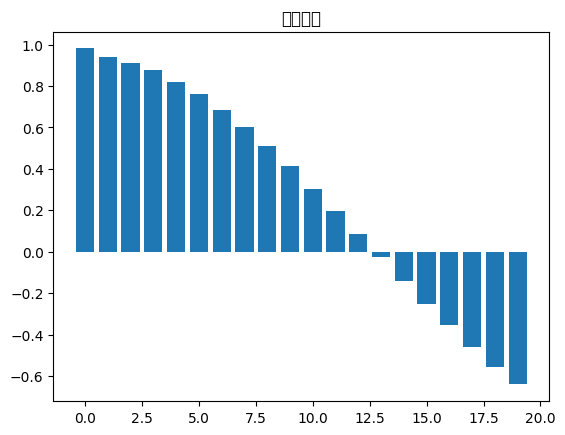


Granger 인과관계 테스트 결과:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=29.7682 , p=0.0000  , df_denom=1047, df_num=1
ssr based chi2 test:   chi2=29.8535 , p=0.0000  , df=1
likelihood ratio test: chi2=29.4370 , p=0.0000  , df=1
parameter F test:         F=29.7682 , p=0.0000  , df_denom=1047, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.8212  , p=0.0222  , df_denom=1044, df_num=2
ssr based chi2 test:   chi2=7.6790  , p=0.0215  , df=2
likelihood ratio test: chi2=7.6510  , p=0.0218  , df=2
parameter F test:         F=3.8212  , p=0.0222  , df_denom=1044, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.6561  , p=0.0000  , df_denom=1041, df_num=3
ssr based chi2 test:   chi2=23.1228 , p=0.0000  , df=3
likelihood ratio test: chi2=22.8714 , p=0.0000  , df=3
parameter F test:         F=7.6561  , p=0.0000  , df_denom=1041, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:   

C:\Users\limul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import ccf, grangercausalitytests, coint, adfuller
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기 및 병합
climate_data_df = pd.read_csv('../ClimateDataTeam/climate_data/merged_weekly_avg_temp.csv')
air_pollutants_df = pd.read_csv('../NewData/Weekly_Air_Pollutants.csv')

# datetime 변환 및 병합
climate_data_df['datetime'] = pd.to_datetime(climate_data_df['datetime'])
air_pollutants_df['datetime'] = pd.to_datetime(air_pollutants_df['datetime'])
merged_df = pd.merge(climate_data_df, air_pollutants_df, on='datetime', how='inner')

# 결측치 확인 및 제거
print("결측치 확인:")
print(merged_df.isnull().sum())
merged_df = merged_df.dropna()

# 변수 분포 확인
merged_df.hist(figsize=(12, 10))
plt.suptitle("변수 분포 확인")
plt.show()

# 정상성 테스트
print("\n정상성 테스트 결과 (첫 번째 기후 변수):")
adf_result = adfuller(merged_df.iloc[:, 1])  # 첫 번째 기후 변수
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

# 데이터 차분 (필요시)
if adf_result[1] > 0.05:
    print("차분 적용 중...")
    merged_df['diff_var'] = merged_df.iloc[:, 1].diff().dropna()

# 교차상관(CCF) 계산 및 시각화
cross_corr = ccf(merged_df.iloc[:, 1], merged_df.iloc[:, 2])[:20]  # 최대 20 lag
plt.bar(range(len(cross_corr)), cross_corr)
plt.title("교차상관")
plt.show()

# Granger 인과관계
print("\nGranger 인과관계 테스트 결과:")
granger_result = grangercausalitytests(merged_df.iloc[:, [1, 2]], maxlag=5, verbose=True)

# 공적분 테스트
print("\n공적분 테스트 결과:")
coint_result = coint(merged_df.iloc[:, 1], merged_df.iloc[:, 2])
print(f"Cointegration p-value: {coint_result[1]}")
